In [32]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
# Set Seaborn style for better visual aesthetics
sns.set(style="whitegrid")
# Load the dataset
file_path = 'Healthcare Providers.csv'
data = pd.read_csv(file_path)

In [33]:
# Data preview
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [34]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [35]:
# Summary statistics
data.describe()

,index,National Provider Identifier,Zip Code of the Provider
count,1.000000e+05,1.000000e+05,1.000000e+05
mean,4.907646e+06,1.498227e+09,4.163820e+08
std,2.839633e+06,2.874125e+08,3.082566e+08
min,2.090000e+02,1.003001e+09,6.010000e+02
25%,2.458791e+06,1.245669e+09,1.426300e+08
50%,4.901266e+06,1.497847e+09,3.633025e+08
75%,7.349450e+06,1.740374e+09,6.819881e+08
max,9.847440e+06,1.993000e+09,9.990166e+08


In [36]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])
# Drop rows with missing values for simplicity (could apply more complex imputation if needed)
data.dropna(inplace=True)

Missing Values:
 First Name of the Provider           4255
Middle Initial of the Provider      29331
Credentials of the Provider          7209
Gender of the Provider               4254
Street Address 2 of the Provider    59363
dtype: int64


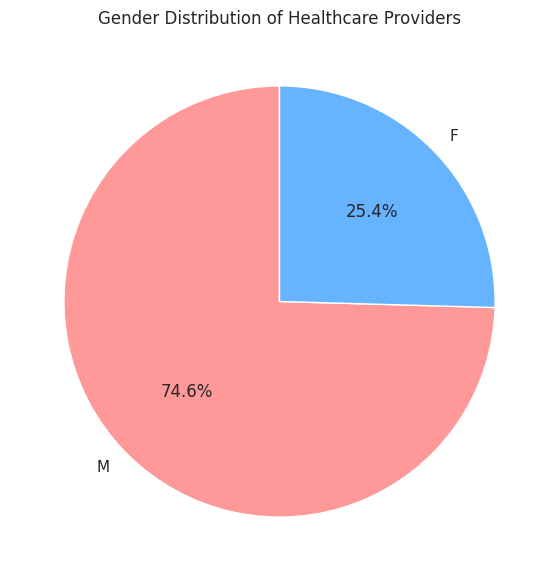

In [37]:
# Pie Chart: Gender Distribution
plt.figure(figsize=(7, 7))
data['Gender of the Provider'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution of Healthcare Providers')
plt.ylabel('')
plt.show()

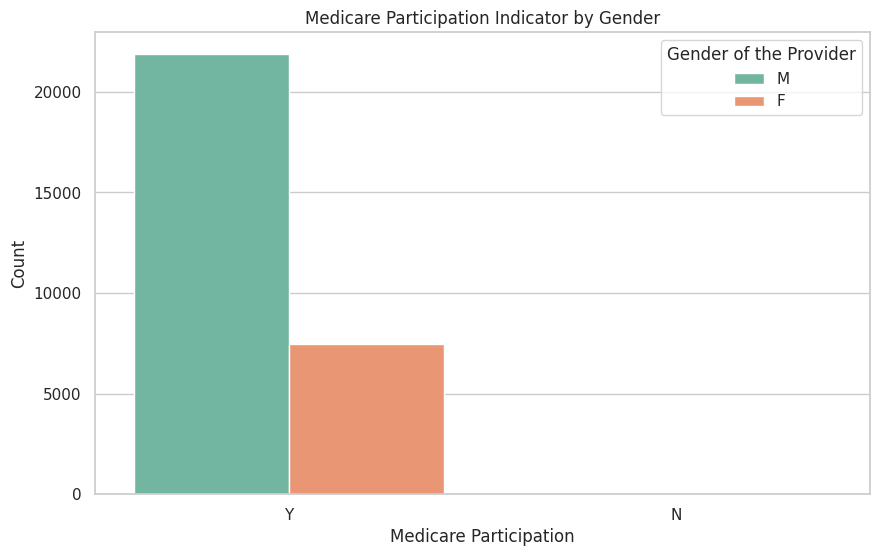

In [38]:
# Bar Plot: Medicare Participation Indicator by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Medicare Participation Indicator', hue='Gender of the Provider', data=data, palette='Set2')
plt.title('Medicare Participation Indicator by Gender')
plt.xlabel('Medicare Participation')
plt.ylabel('Count')
plt.show()

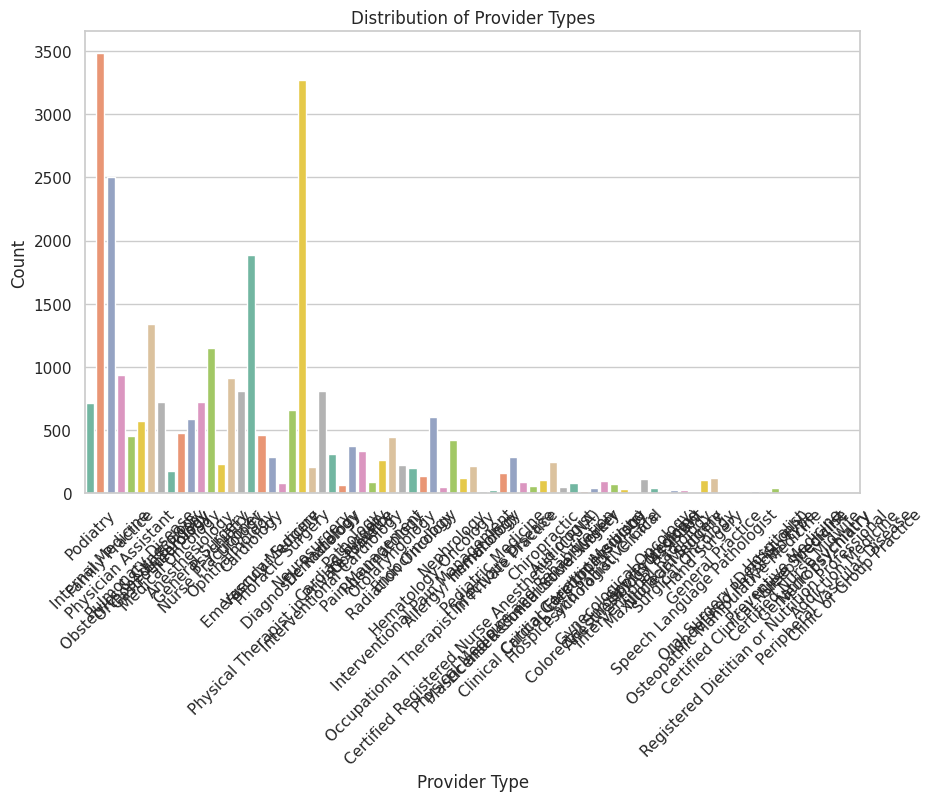

In [39]:
# Bar plot for Provider Type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Provider Type', hue='Provider Type', palette='Set2')
plt.title('Distribution of Provider Types')
plt.xticks(rotation=45)
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.show()

In [40]:
# Data Preprocessing
# Replace commas in numeric columns and convert to float
numeric_columns = ['Number of Services', 'Number of Medicare Beneficiaries',
                   'Number of Distinct Medicare Beneficiary/Per Day Services',
                   'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                   'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']
for col in numeric_columns:
    data[col] = data[col].replace({',': ''}, regex=True).astype(float)
# Label Encoding for categorical variables
le = LabelEncoder()
data['Gender of the Provider'] = le.fit_transform(data['Gender of the Provider'])
data['Entity Type of the Provider'] = le.fit_transform(data['Entity Type of the Provider'])
data['Medicare Participation Indicator'] = le.fit_transform(data['Medicare Participation Indicator'])
data['Place of Service'] = le.fit_transform(data['Place of Service'])
data['HCPCS Drug Indicator'] = le.fit_transform(data['HCPCS Drug Indicator'])

In [41]:
# Selecting features and target variable
X = data[['Number of Services', 'Number of Medicare Beneficiaries',
          'Number of Distinct Medicare Beneficiary/Per Day Services',
          'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
          'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']]
y = data['Medicare Participation Indicator']  # Example fraud indicator column
# Handling imbalanced data using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [50]:
# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, cmap="Blues"):
    """Plots the confusion matrix for a given model."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression
Accuracy: 0.9430681818181819
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      8805
           1       1.00      0.89      0.94      8795

    accuracy                           0.94     17600
   macro avg       0.95      0.94      0.94     17600
weighted avg       0.95      0.94      0.94     17600



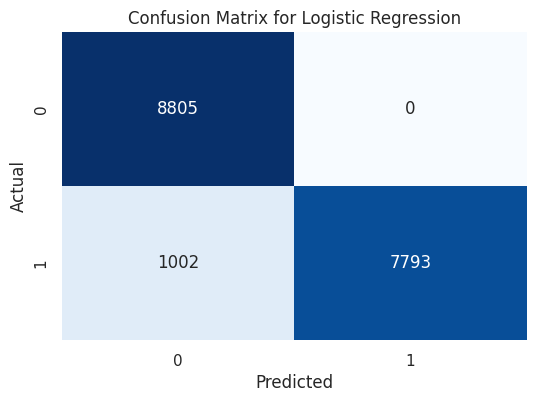

In [43]:
# Logistic Regression
print("Logistic Regression")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

Random Forest
Accuracy: 0.9963068181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8805
           1       1.00      0.99      1.00      8795

    accuracy                           1.00     17600
   macro avg       1.00      1.00      1.00     17600
weighted avg       1.00      1.00      1.00     17600



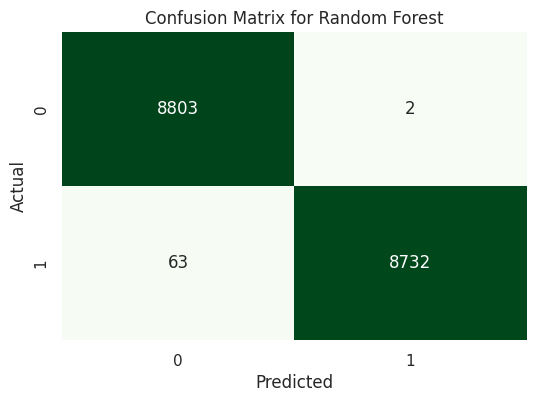

In [44]:
# Random Forest
print("Random Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest", cmap="Greens")

Support Vector Machines (SVC)
Accuracy: 0.9335795454545455
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      8805
           1       1.00      0.87      0.93      8795

    accuracy                           0.93     17600
   macro avg       0.94      0.93      0.93     17600
weighted avg       0.94      0.93      0.93     17600



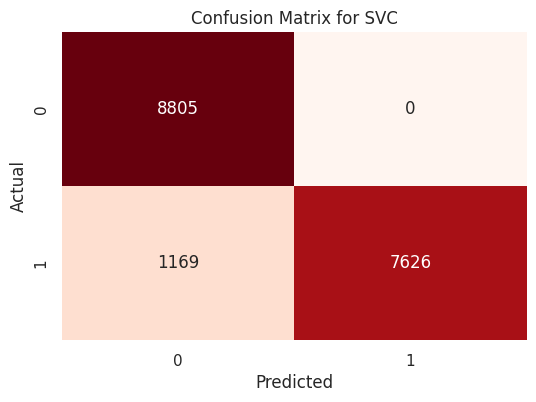

In [45]:
# Support Vector Machines (SVC)
print("Support Vector Machines (SVC)")
linear_svc = LinearSVC(random_state=42, dual=False)
linear_svc.fit(X_train, y_train)
y_pred_linear_svc = linear_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_linear_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_linear_svc))
plot_confusion_matrix(y_test, y_pred_linear_svc, "SVC", cmap="Reds")

Gradient Boosting
Accuracy: 0.9794886363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8805
           1       1.00      0.96      0.98      8795

    accuracy                           0.98     17600
   macro avg       0.98      0.98      0.98     17600
weighted avg       0.98      0.98      0.98     17600



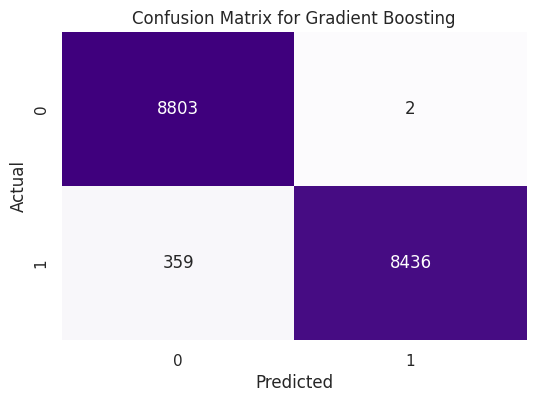

In [46]:
# Gradient Boosting
print("Gradient Boosting")
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting", cmap="Purples")

Neural Networks
Accuracy: 0.9967613636363636
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8805
           1       1.00      0.99      1.00      8795

    accuracy                           1.00     17600
   macro avg       1.00      1.00      1.00     17600
weighted avg       1.00      1.00      1.00     17600



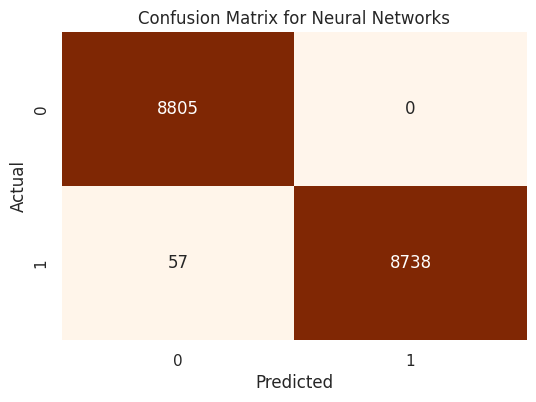

In [47]:
# Neural Networks (MLP)
print("Neural Networks")
nn = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
plot_confusion_matrix(y_test, y_pred_nn, "Neural Networks", cmap="Oranges")

In [51]:
# Summarizing accuracy of each model
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVC": accuracy_score(y_test, y_pred_linear_svc),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "Neural Networks": accuracy_score(y_test, y_pred_nn)
}
# Identify the best performing model
best_model_name = max(models, key=models.get)
best_model_accuracy = models[best_model_name]
print(f"Best Model: {best_model_name} with accuracy: {best_model_accuracy:.4f}")

Best Model: Neural Networks with accuracy: 0.9968


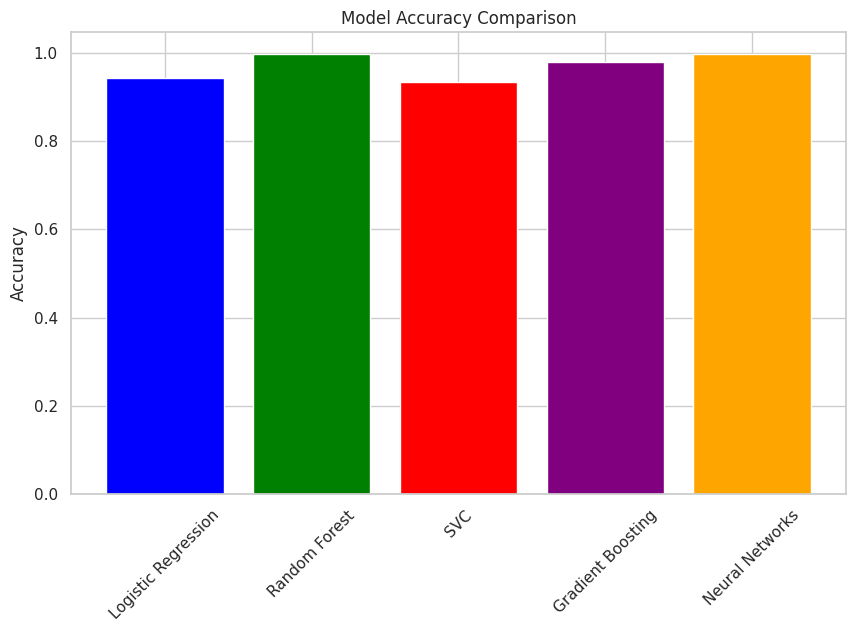

In [52]:
# Plotting Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()